In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt

/Users/abhaykumar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [3]:
# Adjust the path to the correct location of the dataset
file_path = 'KDDTrain+.txt'
# file_path = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [4]:
# Load the dataset
df = pd.read_csv(file_path, header=None, names=columns)

In [5]:
df['label'] = df['dst_host_srv_rerror_rate'].apply(lambda x: 0 if x != 'normal' else 1)
df = df.drop(["dst_host_srv_rerror_rate"], axis=1)

In [6]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
0,udp,other,SF,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
0,tcp,private,S0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
0,tcp,http,SF,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
0,tcp,http,SF,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
8,udp,private,SF,105,145,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
0,tcp,smtp,SF,2231,384,0,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
0,tcp,klogin,S0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [7]:
print(df.dtypes)

duration                        object
protocol_type                   object
service                         object
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [8]:
# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
unique_values_set = set(y_train)
print("Unique Values:", list(unique_values_set))

Unique Values: [0, 1]


In [11]:
# Define categorical features for one-hot encoding
categorical_features = ['duration' ,'protocol_type', 'service'] # , 'dst_host_srv_rerror_rate'

In [12]:
# # Create column transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), X_train.columns.difference(categorical_features)),
#         ('cat', OneHotEncoder(), categorical_features),
#     ]
# )

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns.difference(categorical_features)),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [14]:
# Create the pipeline with the preprocessor and Isolation Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', IsolationForest(contamination=0.05, random_state=42))
])

In [15]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate...
       'num_file_creations', 'num_outbound_cmds', 'num_root', 'num_shells',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate', 'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['duration', 'protocol_type',
                                                   'service'])])),
                ('clf', IsolationForest(contamination=0.05, random_state=42))])

In [16]:
# file_path2 = 'KDDTest+.txt'

In [17]:
# # Load the dataset
# df2 = pd.read_csv(file_path2, header=None, names=columns)

In [18]:
# print(df2.dtypes)

In [19]:
# # Separate features and labels
# X_test = df2.drop('label', axis=1)
# y_test = df2['label']

In [20]:
# Predict anomalies on the test set
predictions = pipeline.predict(X_test)

In [21]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
unique_values_set = set(predictions)
print("Unique Values:", list(unique_values_set))

Unique Values: [1, -1]


In [23]:
predictions[predictions == -1] = 0

In [24]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
unique_values_set = set(predictions)
print("Unique Values:", list(unique_values_set))

Unique Values: [0, 1]


In [26]:
# Evaluate the performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.09      0.15     11773
           1       0.55      0.98      0.71     13422

    accuracy                           0.56     25195
   macro avg       0.68      0.53      0.43     25195
weighted avg       0.67      0.56      0.45     25195



In [27]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
y_pred = predictions

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.5503924515698063
Recall: 0.9821934137982417
F1-Score: 0.705463691336223


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5630879142687041


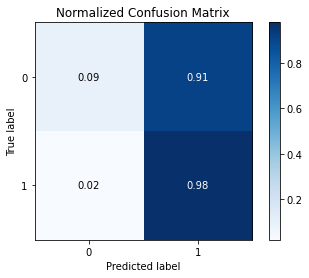

In [31]:
# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

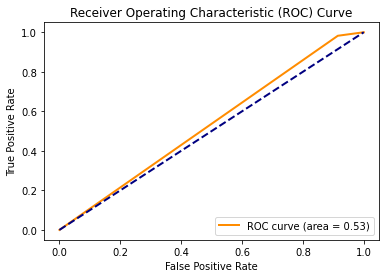

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


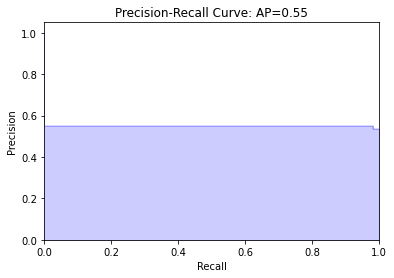

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()


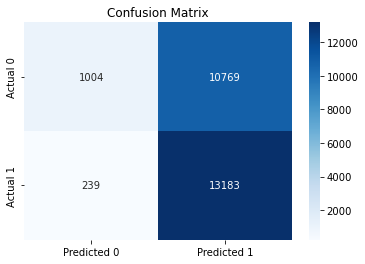

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.show()


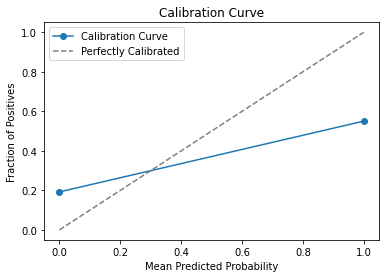

In [35]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
